# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [ ]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [ ]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de treinamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [ ]:
print('Número de minibatches de treinamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de treinamento: 600


## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10)

In [ ]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.3217,  0.4136, -0.1154,  0.3577,  0.3285, -0.1790, -0.3090, -0.4439,
          0.6696, -0.3211]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [ ]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [ ]:
print('Final loss:', loss.data)

Final loss: tensor(0.2059)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

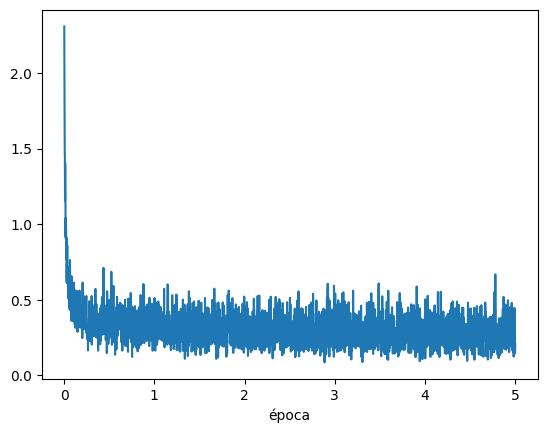

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

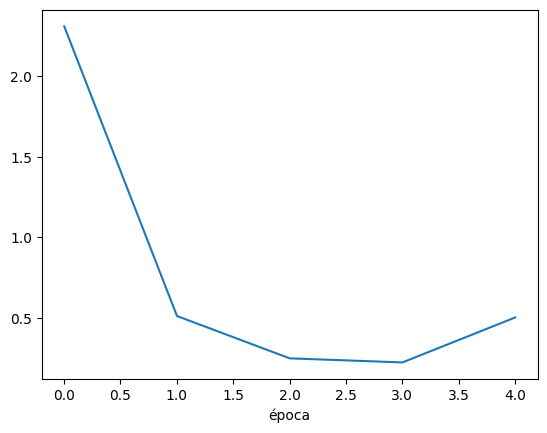

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch? **R - 600**
2. Em uma época, quantos mini-batches existem? **R - 600**
3. Qual é a definição de época? **R - Uma época é definida como uma passagem completa por todo o conjunto de dados de treinamento.**

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [ ]:
# Exercício 1

epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print('Época: {}/{}, batch: {}'.format(i+1, n_epochs, k))

Época: 1/5, batch: 0
Época: 1/5, batch: 1
Época: 1/5, batch: 2
Época: 1/5, batch: 3
Época: 1/5, batch: 4
Época: 1/5, batch: 5
Época: 1/5, batch: 6
Época: 1/5, batch: 7
Época: 1/5, batch: 8
Época: 1/5, batch: 9
Época: 1/5, batch: 10
Época: 1/5, batch: 11
Época: 1/5, batch: 12
Época: 1/5, batch: 13
Época: 1/5, batch: 14
Época: 1/5, batch: 15
Época: 1/5, batch: 16
Época: 1/5, batch: 17
Época: 1/5, batch: 18
Época: 1/5, batch: 19
Época: 1/5, batch: 20
Época: 1/5, batch: 21
Época: 1/5, batch: 22
Época: 1/5, batch: 23
Época: 1/5, batch: 24
Época: 1/5, batch: 25
Época: 1/5, batch: 26
Época: 1/5, batch: 27
Época: 1/5, batch: 28
Época: 1/5, batch: 29
Época: 1/5, batch: 30
Época: 1/5, batch: 31
Época: 1/5, batch: 32
Época: 1/5, batch: 33
Época: 1/5, batch: 34
Época: 1/5, batch: 35
Época: 1/5, batch: 36
Época: 1/5, batch: 37
Época: 1/5, batch: 38
Época: 1/5, batch: 39
Época: 1/5, batch: 40
Época: 1/5, batch: 41
Época: 1/5, batch: 42
Época: 1/5, batch: 43
Época: 1/5, batch: 44
Época: 1/5, batch: 4

Com o batch_size de 200 o resultado foi:

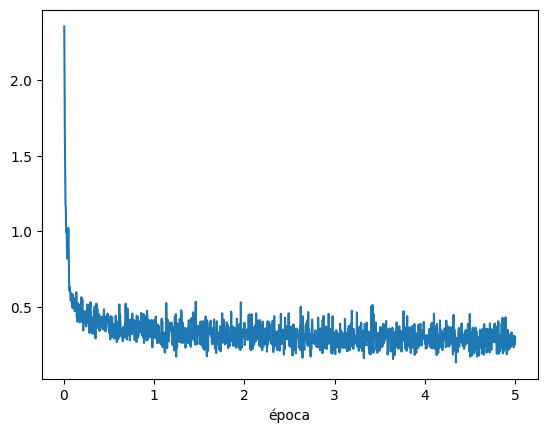 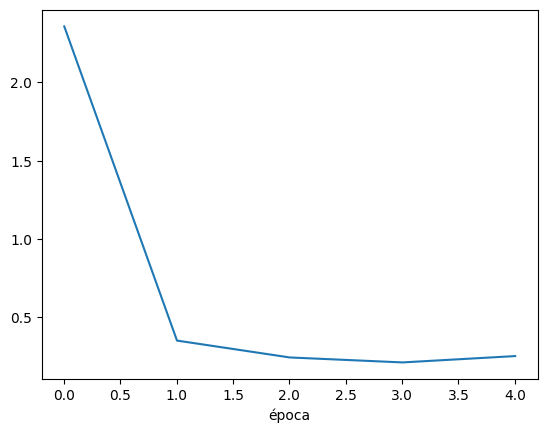

Com o batch_size de 50 o resultado foi:

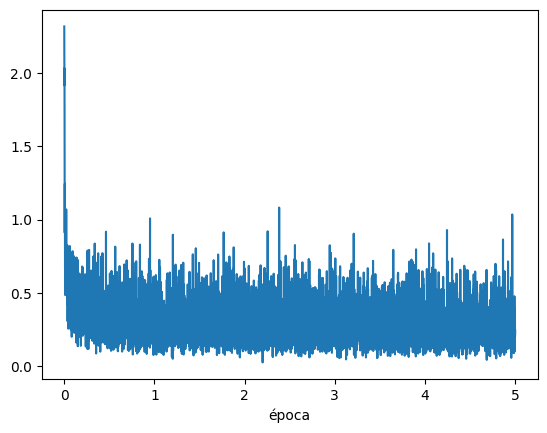 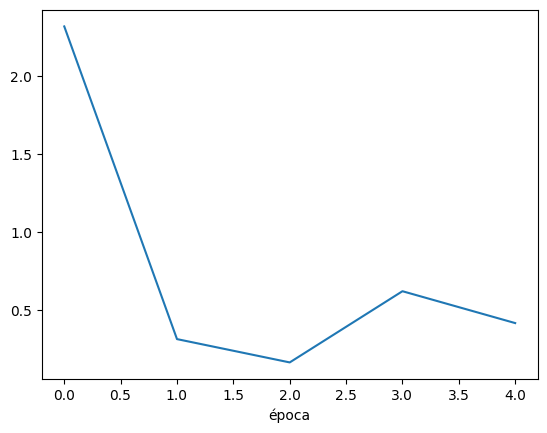

## Conclusões sobre os experimentos deste notebook


**Conclusão:** Quando aumentei o tamanho do batch para 200 (o dobro do tamanho inicial de 100), o número de mini-amostras caiu para 300 (originalmente era 600), com isso, a variação da perda nos gráficos caiu, ficando mais comportado acompanhando a redução de minibatches. Quando reduzi o batch_size para 50 (metade do valor original de 100), o oposto ocorreu, o número de minibatches subiu para 1200, o que afetou significativamente os gráficos de perdas que registrou uma variação bem mais alta.

O que faz sentido, já que com o aumento de mini-amostras também há o aumento no número de vezes que o calculo de perda terá que ser feito no final de cada época ou durante o treinamento.

Também notei um aumento muito pequeno no tempo de treinamneto em relação ao tamanho dos minibatches, quanto maior o número de mini amostras, maior o tempo de treinamento. Embora a diferença seja muito pequena, questão de segundos. Por exemplo:

batch_size: 100
mini amostras: 600
Tempo de execução: 46s

batch_size: 50
mini amostras: 1200
Tempo de execução: 1min